In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import floor as flr
import spectral_analysis as sa

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>


# CLASSICAL INTERFERENCE - interfering pulse with its time delayed copy

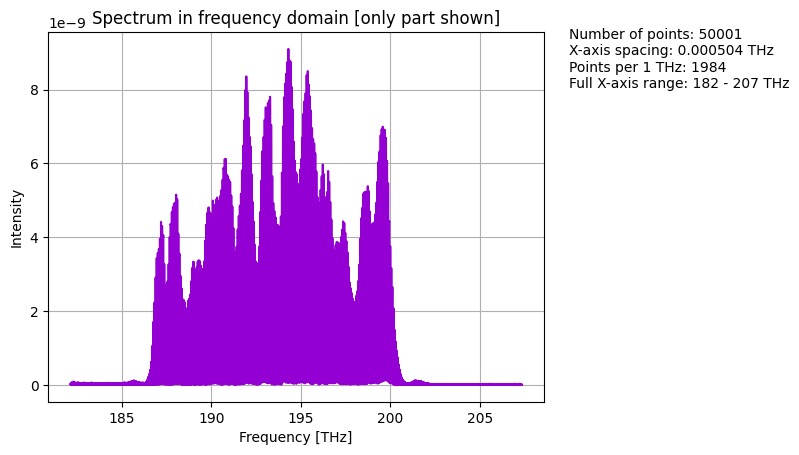

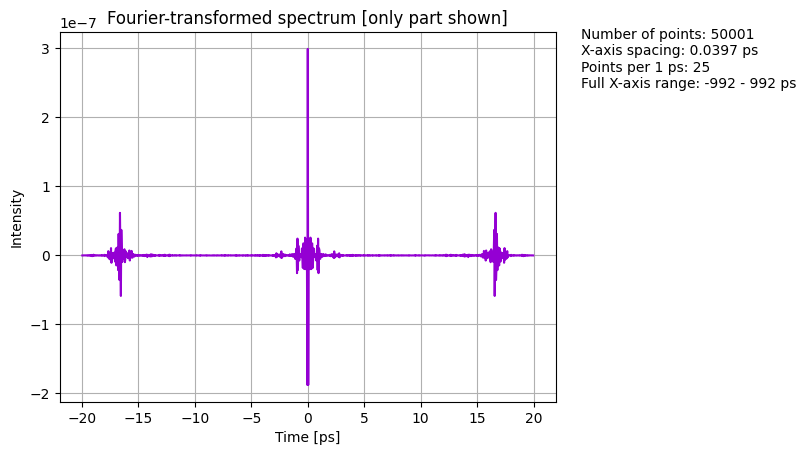

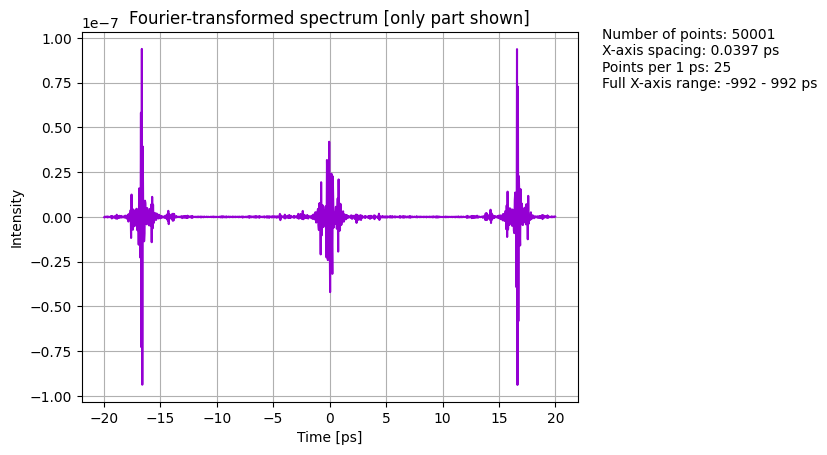

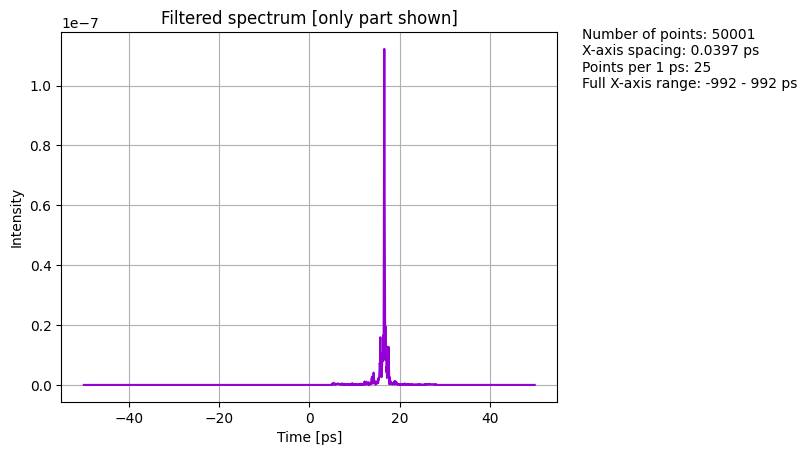

AttributeError: module 'spectral_analysis' has no attribute 'smart_shift'

In [18]:
# load data

no_shear = sa.load_tsv("Interference_spectrum_9.6mm.dat")

# changing to frequency domain

s_freq = no_shear.wl_to_freq(inplace = False)
s_const = s_freq.constant_spacing(inplace = False)
sa.plot(s_const, title = "Spectrum in frequency domain", start = 180, end = 210)

# fourier transform

s_ft = s_const.fourier(inplace = False)
sa.plot(s_ft, title = "Fourier-transformed spectrum", start = -20, end = 20, what_to_plot = "real")
sa.plot(s_ft, title = "Fourier-transformed spectrum", start = -20, end = 20, what_to_plot = "imag")


# filter

s_ft.replace_with_zeros(end = 5)
s_ft.replace_with_zeros(start = 28.2)
sa.plot(s_ft, title = "Filtered spectrum", start = -50, end = 50)

# shift

s_shift = sa.smart_shift(s_ft, -16.6) # centered at -16.6, but we do want to have time delay
sa.plot(s_shift, title = "Shifted spectrum", type = "time", min = -50, max = 50)

# inverse fourier

s_ift = sa.inv_fourier(s_shift, fourier_shift = True)
sa.plot(s_ift, title = "Inverse Fourier spectrum", type = "freq")

# prepare data to plot

values = s_ift.values[:, 1].copy()
X = s_ift.values[:, 0].copy()
values = np.angle(values)

start = -8
end = 7

s = np.searchsorted(X, start)
e = np.searchsorted(X, end)

X = X[s:e]
values = values[s:e]

values = np.unwrap(values)

# plot

plt.scatter(X, values, color = "orange", s = 1)
plt.title("Spectral phase DIFFERENCE between pulse and its delayed copy")
plt.xlabel("Frequency [THz]")
plt.ylabel("Spectral phase")
plt.grid()
plt.show()

# Time delay interference simulation

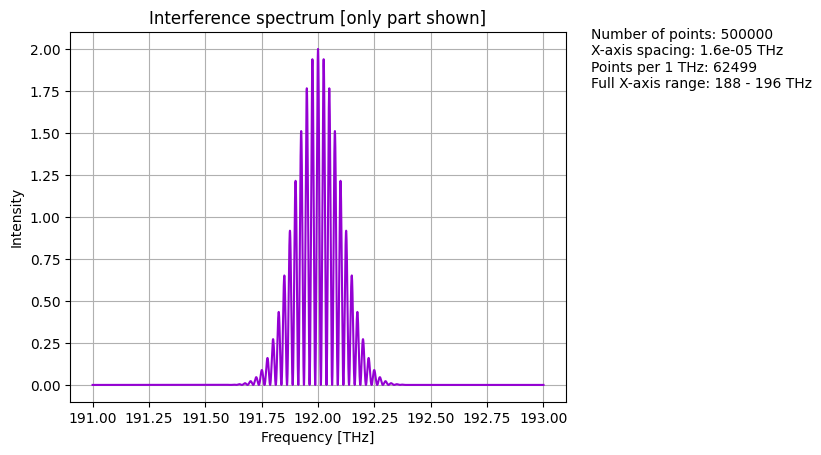

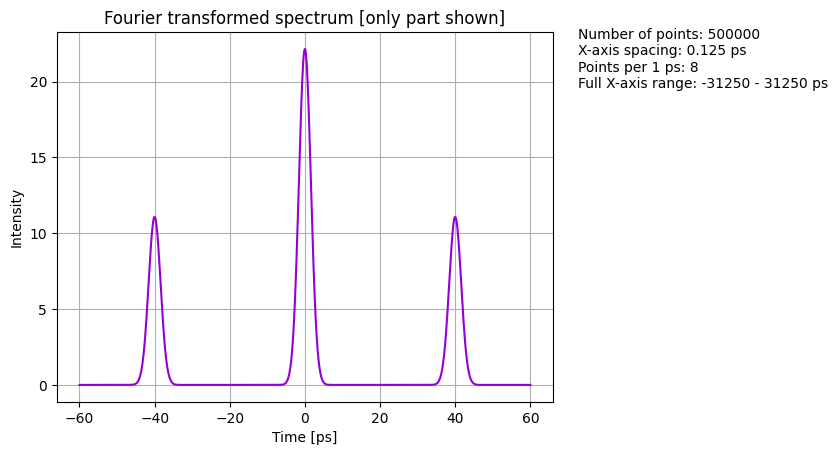

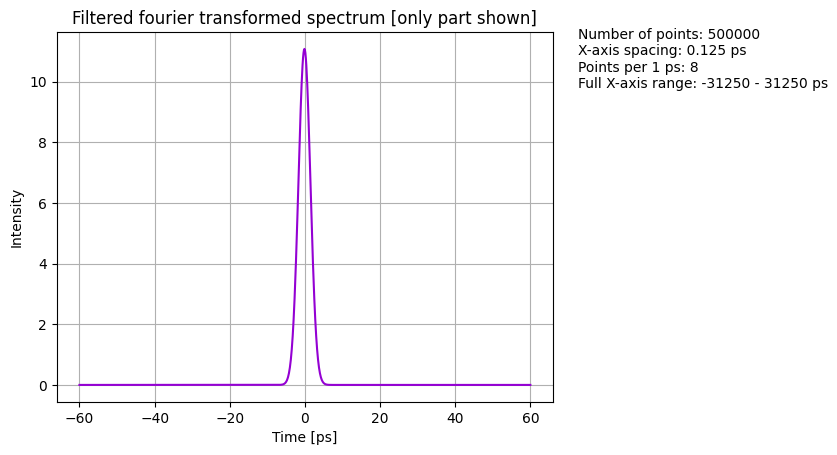

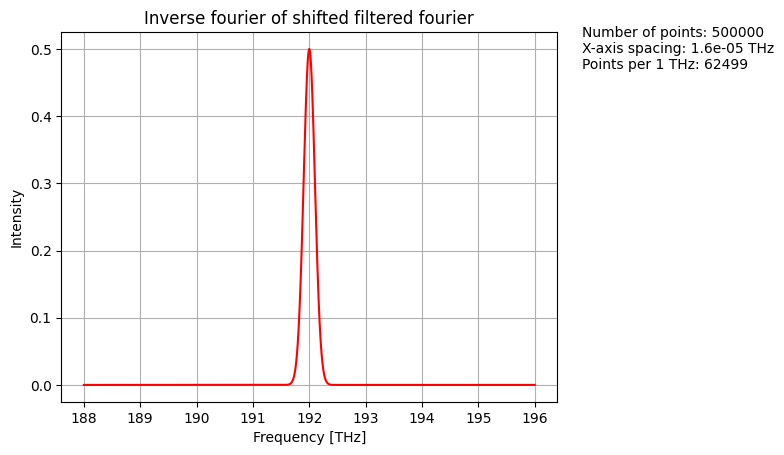

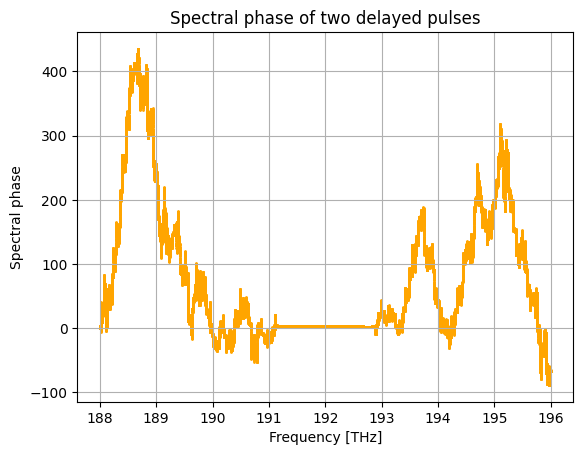

In [ ]:
# normal distribution

def gaussian(omega, mu, sig = 1):
    return np.exp(-np.power(omega - mu, 2.) / (2 * np.power(sig, 2.)))
gaussian = np.vectorize(gaussian)

# fabricate data

mean = 192
sd = 0.1
freq = 40

line = np.linspace(188, 196, 500000)
y = gaussian(line, mean, sd)*(1+np.cos(freq*2*np.pi*line))
spectrum = pd.DataFrame(np.transpose(np.stack([line, y])))
sa.plot(spectrum, type = "freq", title = "Interference spectrum", min = 191, max = 193)

# fourier

ft_spectrum = sa.fourier(spectrum, fourier_shift = True)
sa.plot(ft_spectrum, type = "time", title = "Fourier transformed spectrum", min = -60, max = 60)

# heaviside and shift

ft_spectrum = sa.replace_with_zeros(ft_spectrum, start = "min", end = 20)
ft_spectrum = sa.replace_with_zeros(ft_spectrum, start = 60, end = "max")

shift = -40

ft_spectrum = sa.smart_shift(ft_spectrum, shift)
sa.plot(ft_spectrum, type = "time", title = "Filtered fourier transformed spectrum", min = -60, max = 60)

# inverse fourier

s_ift = sa.inv_fourier(ft_spectrum, fourier_shift = True)
s_ift.values[:, 0] = line
values = s_ift.values[:, 1].copy()

sa.plot(s_ift, color = "red", title = "Inverse fourier of shifted filtered fourier", type = "freq")

# phase extraction

values = np.angle(values)
values = np.unwrap(values)

plt.scatter(line, values, color = "orange", s = 1)
plt.title("Spectral phase of two delayed pulses")
plt.xlabel("Frequency [THz]")
plt.ylabel("Spectral phase")
plt.grid()
plt.show()